# Learning Python Analytics

The dataset is exported from Hevy, the application I use to track my workouts.
Here I provide visualizations and analytics of this dataset to learn Python.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import array

# Set default figure size
plt.rcParams['figure.figsize'] = [21, 16]

column_names = [
    'title', 'start_time', 'end_time', 'description', 'exercise_title',
    'superset_id', 'exercise_notes', 'set_index', 'set_type', 'weight_kg',
    'reps', 'distance_km', 'duration_seconds', 'rpe'
]

df = pd.read_csv("workout_data.csv", names=column_names, header=0)

In [30]:
df.head()

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
0,Shoulders,"12 Dec 2024, 13:18","12 Dec 2024, 14:27",NaN,Leg Raise Parallel Bars,NaN,NaN,0,normal,NaN,15.0,NaN,NaN,NaN
1,Shoulders,"12 Dec 2024, 13:18","12 Dec 2024, 14:27",NaN,Leg Raise Parallel Bars,NaN,NaN,1,normal,NaN,15.0,NaN,NaN,NaN
2,Shoulders,"12 Dec 2024, 13:18","12 Dec 2024, 14:27",NaN,Leg Raise Parallel Bars,NaN,NaN,2,normal,NaN,15.0,NaN,NaN,NaN
3,Shoulders,"12 Dec 2024, 13:18","12 Dec 2024, 14:27",NaN,Leg Raise Parallel Bars,NaN,NaN,3,normal,NaN,15.0,NaN,NaN,NaN
4,Shoulders,"12 Dec 2024, 13:18","12 Dec 2024, 14:27",NaN,Decline Crunch (Weighted),NaN,NaN,0,normal,10.0,12.0,NaN,NaN,NaN


### Cleaning the DataFrame

In [31]:
def clean_and_prepare(df: pd.DataFrame) -> pd.DataFrame:
    """Cleaning and preparation of pd.DataFrame

    Args:
        df (pd.DataFrame): Input Data Frame

    Returns:
        pd.DataFrame: Cleaned and Converted Data Frame
    """
    def fill_and_convert(col: pd.Series, replacement, type) -> pd.Series:
        """Helper function to fill and convert data quickly

        Args:
            col (pd.Series): input pd.Series (Column)
            replacement (_type_): Value that replaces the NaN-s
            type (_type_): type of conversion

        Returns:
            pd.Series: filled Column
        """
        col = col.fillna(replacement)
        return col.astype(type)
    
    # Title conversion
    df.title = fill_and_convert(df.title, '', str)
    
    # Description conversion
    df.description = fill_and_convert(df.description, '', str)
    
    # Superset conversion
    df.superset_id = fill_and_convert(df.superset_id, '', str)
    
    # Exercise notes conversion
    df.exercise_notes = fill_and_convert(df.exercise_notes, '', str)
    
    # Weight fill and conversion
    df.weight_kg = fill_and_convert(df.weight_kg, 0, int)
    
    # Reps conversion
    df.reps = fill_and_convert(df.reps, 0, int)
    
    # Distance conversion
    df.distance_km = fill_and_convert(df.distance_km, 0, np.float64)
    
    # Duration conversion - and rounding to integer if not 0
    df.duration_seconds = df.duration_seconds.apply(lambda x: int(round(x)) if pd.notna(x) else 0)
    
    # RPE conversion - if applies
    df.rpe = df.rpe.apply(lambda x: x if pd.notna(x) else 0.0)
    
    # Set Type conversion to category
    df.set_type = df.set_type.astype('category')

    # Start Time conversion to datetime
    df.start_time = pd.to_datetime(df.start_time, format="%d %b %Y, %H:%M")
    
    # End Time conversion to datetime
    df.end_time = pd.to_datetime(df.end_time, format="%d %b %Y, %H:%M")
    
    # Returned value: cleaned and prepared pd.DataFrame
    return df


df = clean_and_prepare(df)

In [32]:
def read_prepared_df(filename: str, col_names) -> pd.DataFrame:
    dataframe = pd.read_csv(filename, names=col_names, header=0)
    dataframe = clean_and_prepare(dataframe)
    
    return dataframe

#### Adding Calculated Fields

In [33]:
def substring_between_brackets(string: str) -> str:
    """Finding a Substring within brackets to extract equipment

    Args:
        string (str): Title of Exercise

    Returns:
        str: Extracted equipment
    """
    start = string.find('(') + 1
    end = string.find(')')
    return string[start:end] if start != -1 and end != -1 else ""

def calculate_duration(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Calculating the duration of workouts by the difference between start and end times
    
    :param dataframe: input df
    :return: df with the `workout_duration` variable calculated
    """
    dataframe['workout_duration'] = (dataframe.end_time - dataframe.start_time).dt.total_seconds() / 60
    return dataframe

def extract_equipment(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['equipment'] = dataframe.exercise_title.apply(lambda x: substring_between_brackets(x))
    return dataframe

def set_order(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['set_order'] = dataframe.groupby('start_time').cumcount() + 1
    return dataframe


# Calculating the duration of workout
df = calculate_duration(df)

# Extracting equipment from title
df = extract_equipment(df)

# Setting the order of exercises within workout
df = set_order(df)

Sorting the workouts by start time and order

In [34]:
df = df.sort_values(by=['start_time', 'set_order'], 
                    ascending = True,
                    ignore_index=True)
df.head()

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe,workout_duration,equipment,set_order
0,Cardio sesh 🥵,2023-06-02 17:00:00,2023-06-02 18:04:00,,Treadmill,,,0,normal,0,0,4.0,2700,0.0,64.0,,1
1,Cardio sesh🥵,2023-06-03 10:15:00,2023-06-03 11:01:00,,Treadmill,,,0,normal,0,0,4.0,2700,0.0,46.0,,1
2,Cardio sesh,2023-06-04 19:11:00,2023-06-04 19:56:00,,Treadmill,,,0,normal,0,0,4.0,2700,0.0,45.0,,1
3,Legs Hamstrings,2023-06-05 18:34:00,2023-06-05 19:43:00,,Romanian Deadlift (Dumbbell),,,0,normal,44,12,0.0,0,0.0,69.0,Dumbbell,1
4,Legs Hamstrings,2023-06-05 18:34:00,2023-06-05 19:43:00,,Romanian Deadlift (Dumbbell),,,1,normal,44,10,0.0,0,0.0,69.0,Dumbbell,2


### Dumbbell Exercises Fix

I know that I logged dumbbell exercises in a wrong way: I only logged the value of one dumbbell, however for a correct volume calculation the sum of the two should have been logged. Therefore I am aiming to search for anomalies in increase when I switched logging of those exercises correctly, and change the old values accordingly.

C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\2685641041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dumbbell['order'] = df_dumbbell.groupby('exercise_title').cumcount() + 1


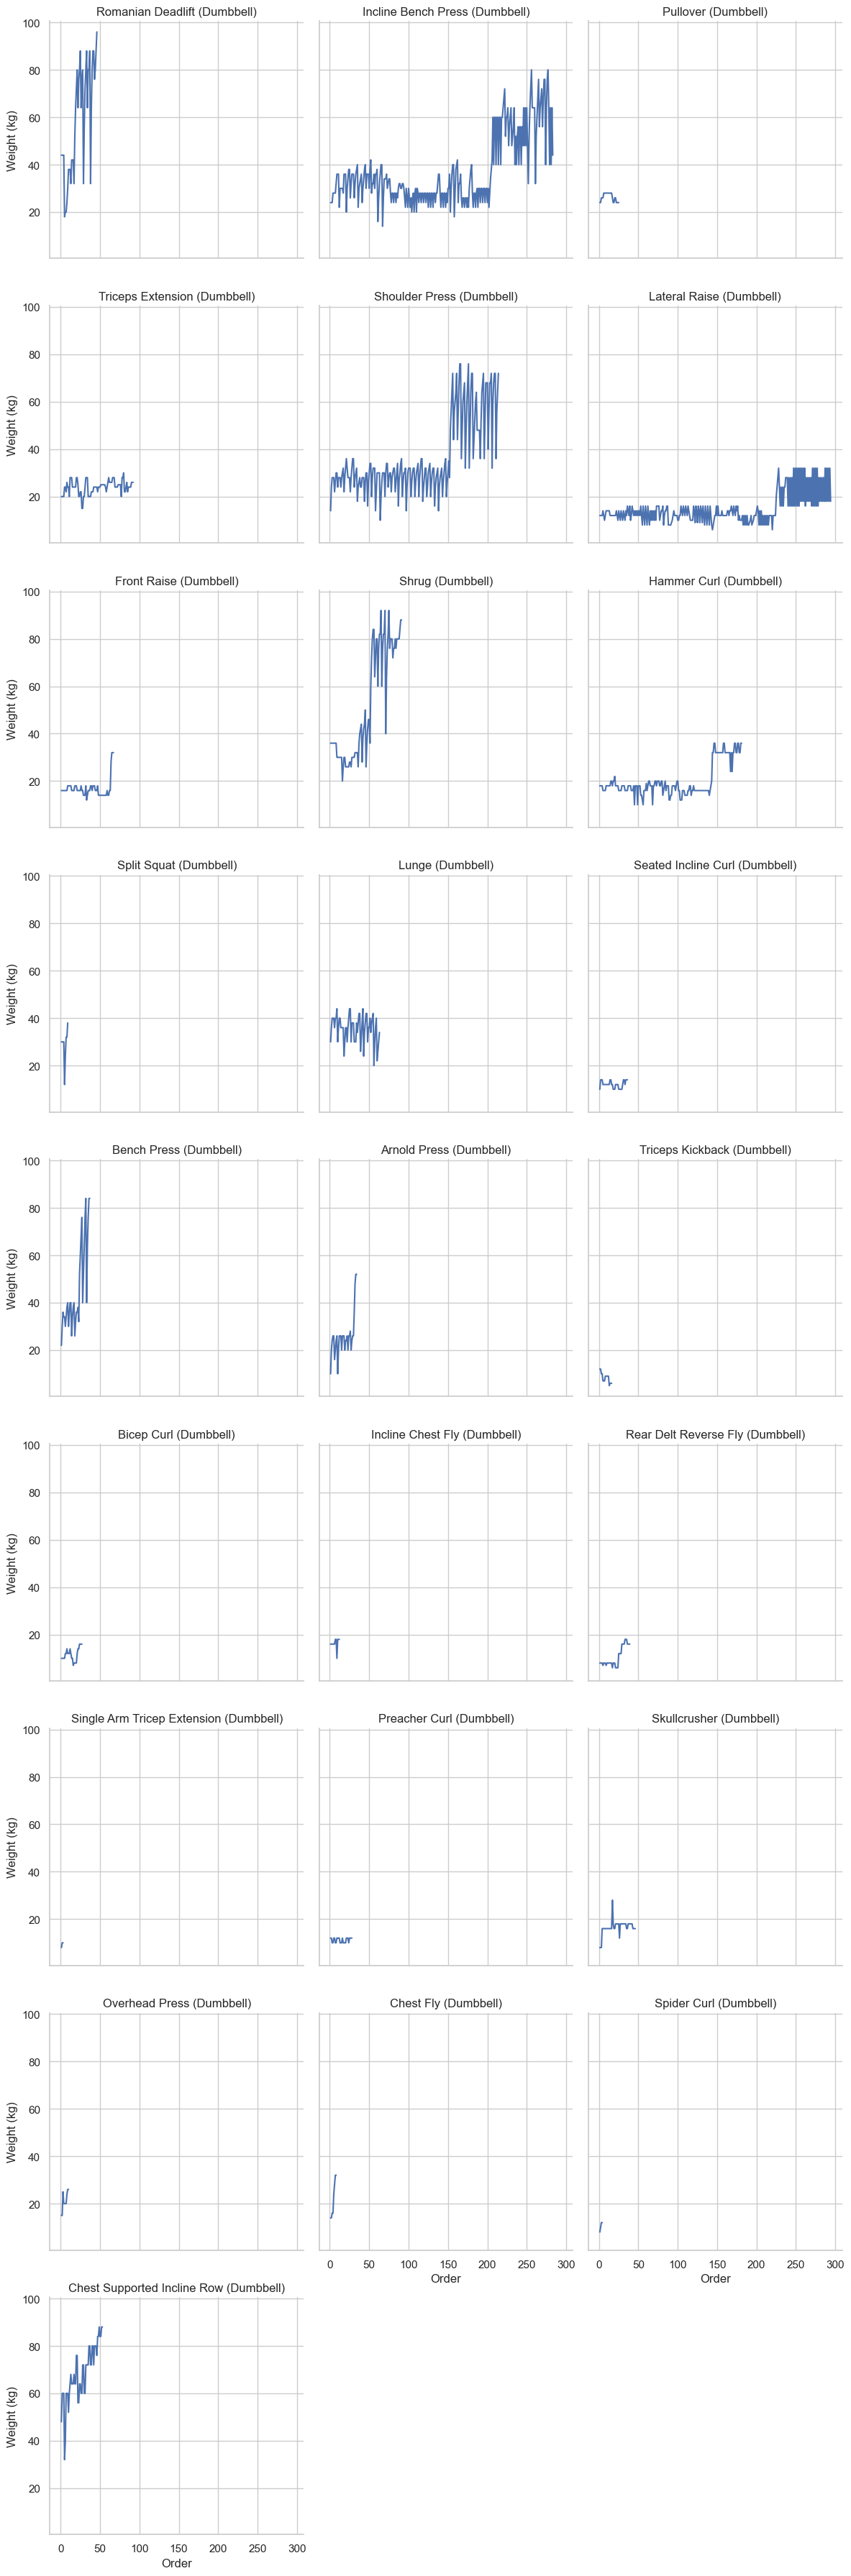

In [35]:
df_dumbbell = df[df.equipment == 'Dumbbell']

# Add an index column grouped by each exercise for plotting order
df_dumbbell['order'] = df_dumbbell.groupby('exercise_title').cumcount() + 1

# Create a FacetGrid for the faceted plot
g = sns.FacetGrid(df_dumbbell, col='exercise_title', col_wrap=3, height=4, sharex=True, sharey=True)

# Map the weight_kg data to the grid using the order as x-axis
g.map(sns.lineplot, 'order', 'weight_kg')

g.set_axis_labels('Order', 'Weight (kg)')
g.set_titles('{col_name}')
g.tight_layout()

plt.show()

In [36]:
df_dumbbell.exercise_title.unique()

array(['Romanian Deadlift (Dumbbell)', 'Incline Bench Press (Dumbbell)',
       'Pullover (Dumbbell)', 'Triceps Extension (Dumbbell)',
       'Shoulder Press (Dumbbell)', 'Lateral Raise (Dumbbell)',
       'Front Raise (Dumbbell)', 'Shrug (Dumbbell)',
       'Hammer Curl (Dumbbell)', 'Split Squat (Dumbbell)',
       'Lunge (Dumbbell)', 'Seated Incline Curl (Dumbbell)',
       'Bench Press (Dumbbell)', 'Arnold Press (Dumbbell)',
       'Triceps Kickback (Dumbbell)', 'Bicep Curl (Dumbbell)',
       'Incline Chest Fly (Dumbbell)', 'Rear Delt Reverse Fly (Dumbbell)',
       'Single Arm Tricep Extension (Dumbbell)',
       'Preacher Curl (Dumbbell)', 'Skullcrusher (Dumbbell)',
       'Overhead Press (Dumbbell)', 'Chest Fly (Dumbbell)',
       'Spider Curl (Dumbbell)', 'Chest Supported Incline Row (Dumbbell)'],
      dtype=object)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\1961134536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incline_bench['order'] = df_incline_bench.groupby('exercise_title').cumcount() + 1


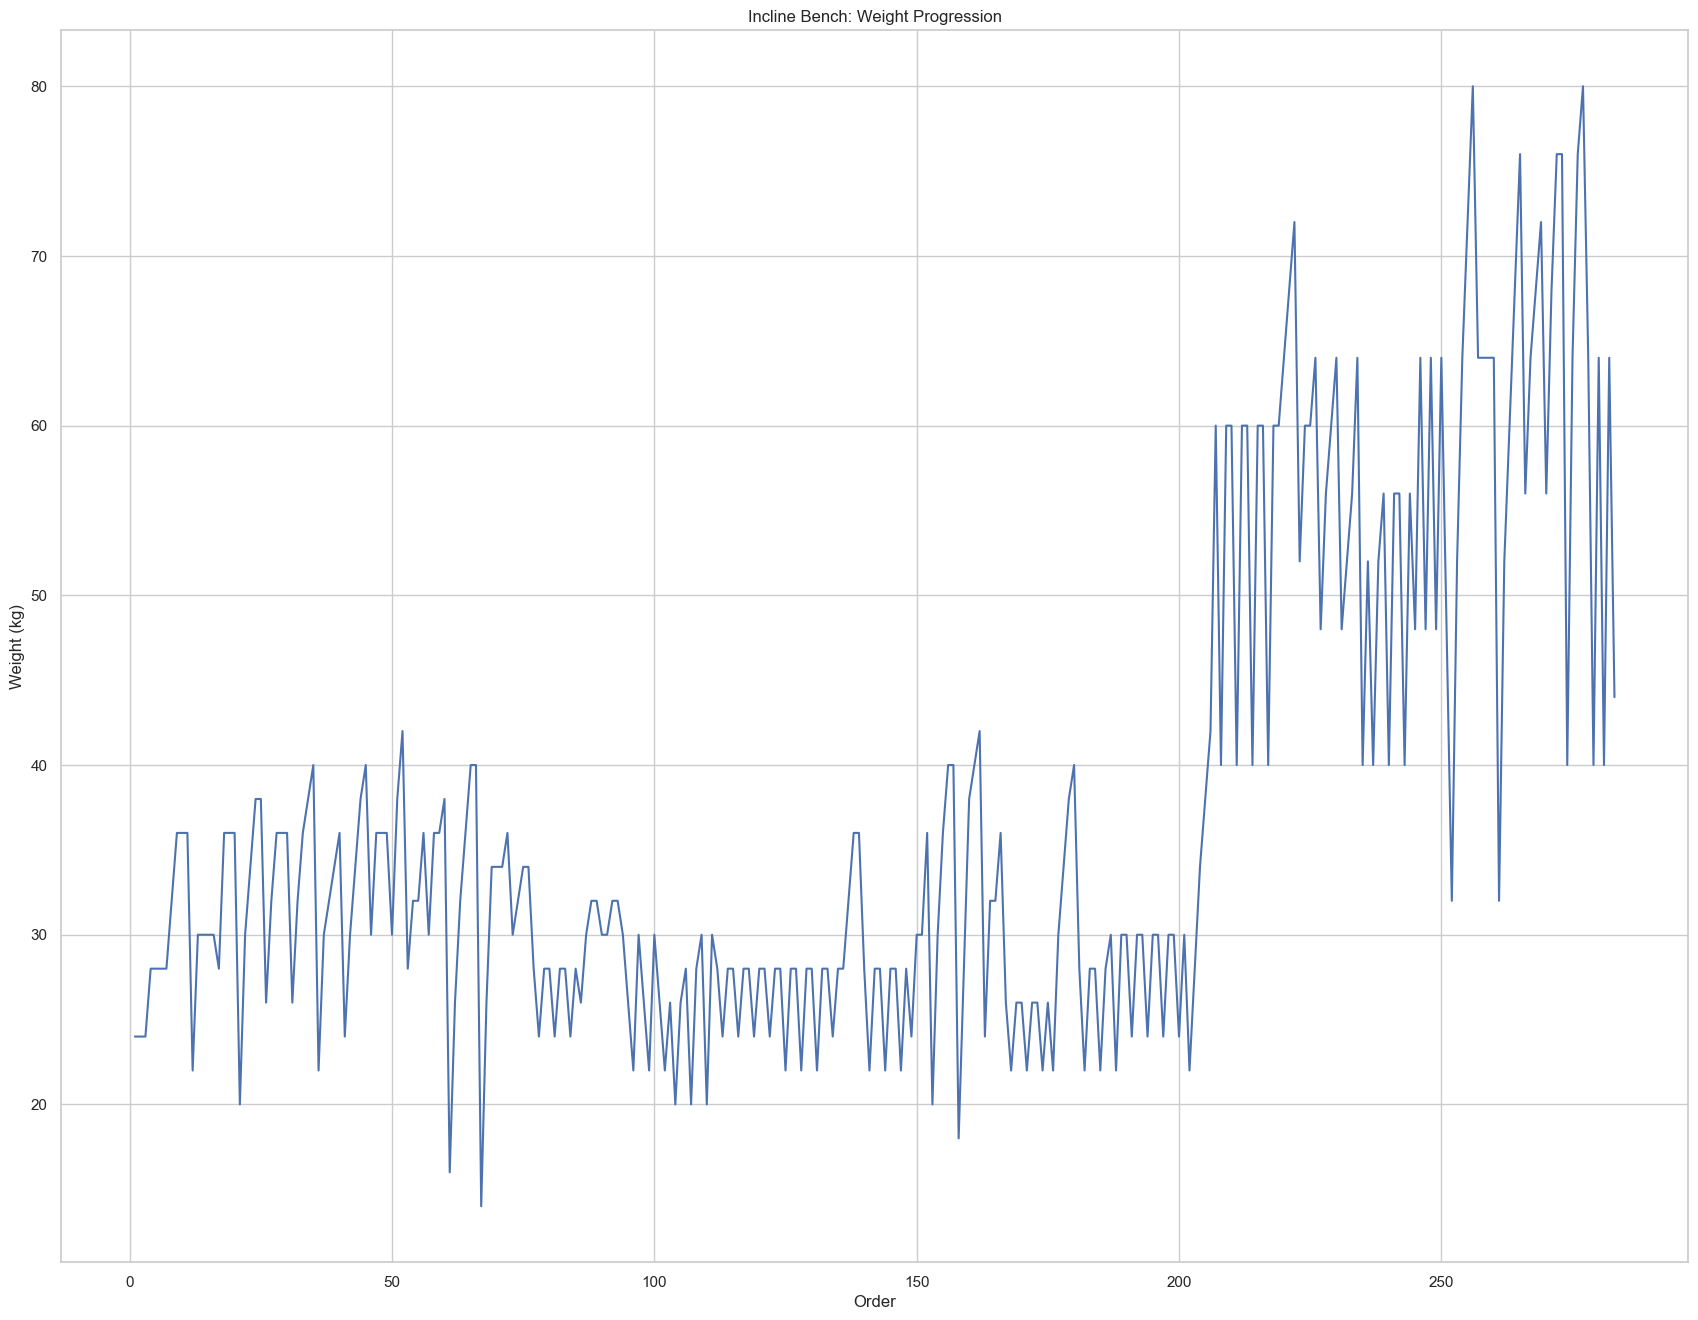

In [37]:
df_incline_bench = df_dumbbell[(df_dumbbell['exercise_title'] == 'Incline Bench Press (Dumbbell)')]

# Add an index column for plotting order
df_incline_bench['order'] = df_incline_bench.groupby('exercise_title').cumcount() + 1

# Create a line plot for the specific exercise
sns.lineplot(data=df_incline_bench, x='order', y='weight_kg')

# Customize the plot
plt.title('Incline Bench: Weight Progression')
plt.xlabel('Order')
plt.ylabel('Weight (kg)')
plt.grid(True)

# Show the plot
plt.show()


In [38]:
df_incline_bench.head()

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe,workout_duration,equipment,set_order,order
33,Evening workout 🏋️,2023-06-08 19:38:00,2023-06-08 21:03:00,,Incline Bench Press (Dumbbell),,24 22 24 piramis,0,normal,24,24,0.0,0,0.0,85.0,Dumbbell,12,1
34,Evening workout 🏋️,2023-06-08 19:38:00,2023-06-08 21:03:00,,Incline Bench Press (Dumbbell),,24 22 24 piramis,1,normal,24,24,0.0,0,0.0,85.0,Dumbbell,13,2
35,Evening workout 🏋️,2023-06-08 19:38:00,2023-06-08 21:03:00,,Incline Bench Press (Dumbbell),,24 22 24 piramis,2,normal,24,24,0.0,0,0.0,85.0,Dumbbell,14,3
219,Chest,2023-06-22 17:23:00,2023-06-22 19:22:00,,Incline Bench Press (Dumbbell),,,0,normal,28,18,0.0,0,0.0,119.0,Dumbbell,11,4
220,Chest,2023-06-22 17:23:00,2023-06-22 19:22:00,,Incline Bench Press (Dumbbell),,,1,normal,28,18,0.0,0,0.0,119.0,Dumbbell,12,5


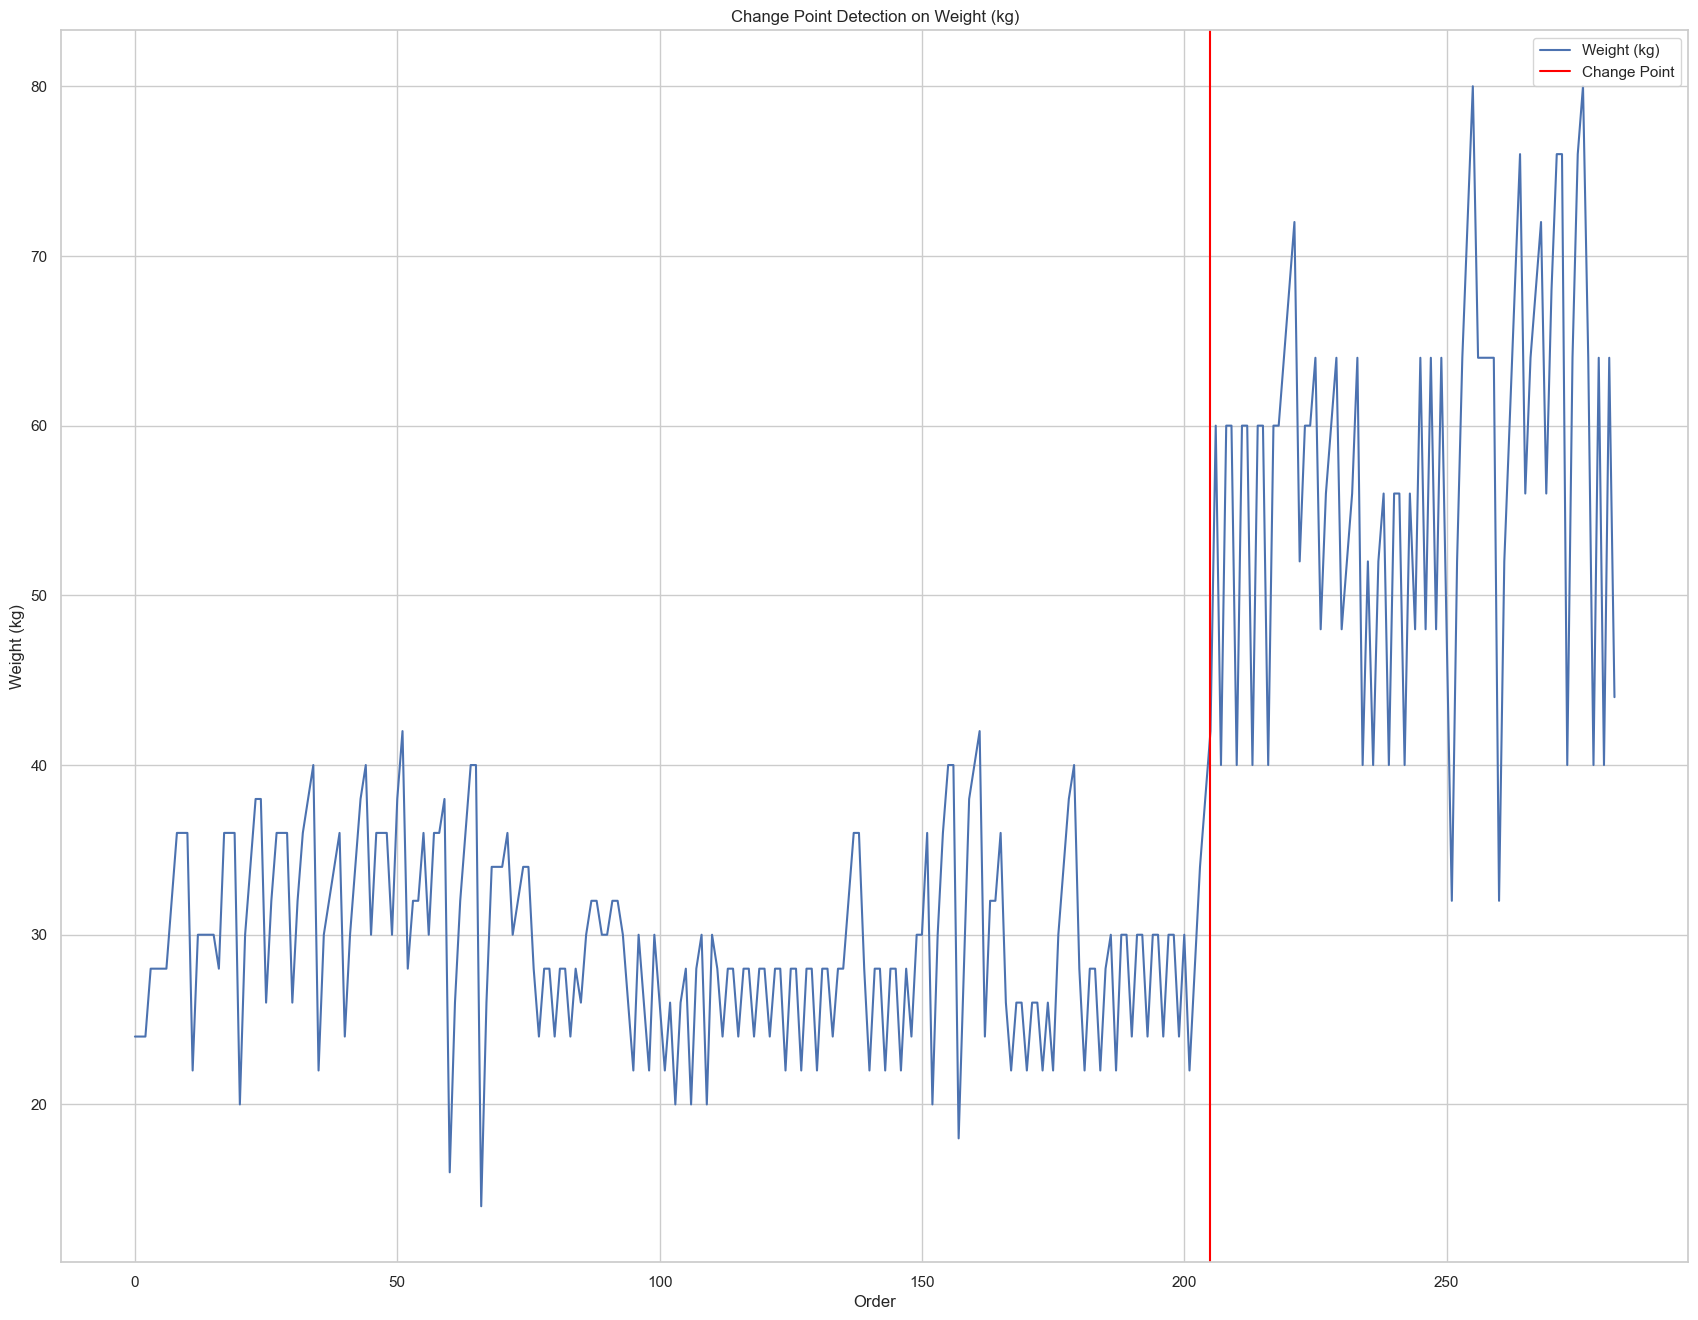

Change points detected at indices: [205]


In [59]:
import ruptures as rpt

weights = df_incline_bench['weight_kg'].values
algo = rpt.Pelt(model="l2").fit(weights)

# This penalty might need some tuning when applied to other exercises
breakpoints = algo.predict(pen=1200)[:-1]


plt.plot(weights, label='Weight (kg)')
for bp in breakpoints:
    plt.axvline(bp, color='red', linestyle='-', label='Change Point' if bp == breakpoints[0] else "")
plt.title('Change Point Detection on Weight (kg)')
plt.xlabel('Order')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Change points detected at indices: {breakpoints}")

#### Volume Calculations

In [40]:
df['volume_per_exercise'] = df.weight_kg * df.reps

df_total_volume = df.groupby('start_time')['volume_per_exercise'].sum().reset_index()
df_total_volume.columns = ['start_time', 'total_volume']

df_cumulative_volume = df.groupby('start_time')['volume_per_exercise'].cumsum()
df_cumulative_volume.colums = ['start_time', 'cumulative_volume']

Merge volumes to the original dataframe

In [41]:
df_total_volume.head()

,start_time,total_volume
0,2023-06-02 17:00:00,0
1,2023-06-03 10:15:00,0
2,2023-06-04 19:11:00,0
3,2023-06-05 18:34:00,9060
4,2023-06-08 19:38:00,8806


In [42]:
df_cumulative_volume.head()

0      0
1      0
2      0
3    528
4    968
Name: volume_per_exercise, dtype: int64

In [43]:
df = df.merge(df_total_volume, left_on='start_time', right_on='start_time', how='left')

df['cumulative_volume'] = df_cumulative_volume

In [44]:
df.sample(5)

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe,workout_duration,equipment,set_order,volume_per_exercise,total_volume,cumulative_volume
2608,Shoulders and cardio,2024-01-12 17:08:00,2024-01-12 18:35:00,,Rear Delt Reverse Fly (Machine),,Getting better,2,normal,50,10,0.0,0,0.0,87.0,Machine,19,500,4788,4558
4423,Shoulders,2024-06-14 10:35:00,2024-06-14 11:40:00,,Rear Delt Reverse Fly (Dumbbell),1.0,,3,normal,8,12,0.0,0,0.0,65.0,Dumbbell,8,96,2521,1517
4136,Kis csecs,2024-05-23 18:37:00,2024-05-23 19:40:00,,Incline Bench Press (Dumbbell),,,2,normal,34,10,0.0,0,0.0,63.0,Dumbbell,3,340,6006,784
3058,Shoulders,2024-02-16 07:10:00,2024-02-16 08:06:00,,Shoulder Press (Dumbbell),,,1,normal,26,12,0.0,0,0.0,56.0,Dumbbell,2,312,6299,612
5843,Legs,2024-11-30 18:51:00,2024-11-30 19:58:00,,Back Extension (Weighted Hyperextension),,,2,normal,25,12,0.0,0,0.0,67.0,Weighted Hyperextension,3,300,21679,480


#### Making sure the DataFrame is ordered by Time

C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\929957558.py:6: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\929957558.py:6: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\929957558.py:6: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\929957558.py:6: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\929957558.py:6: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from font(s) Arial.
  fig.canvas

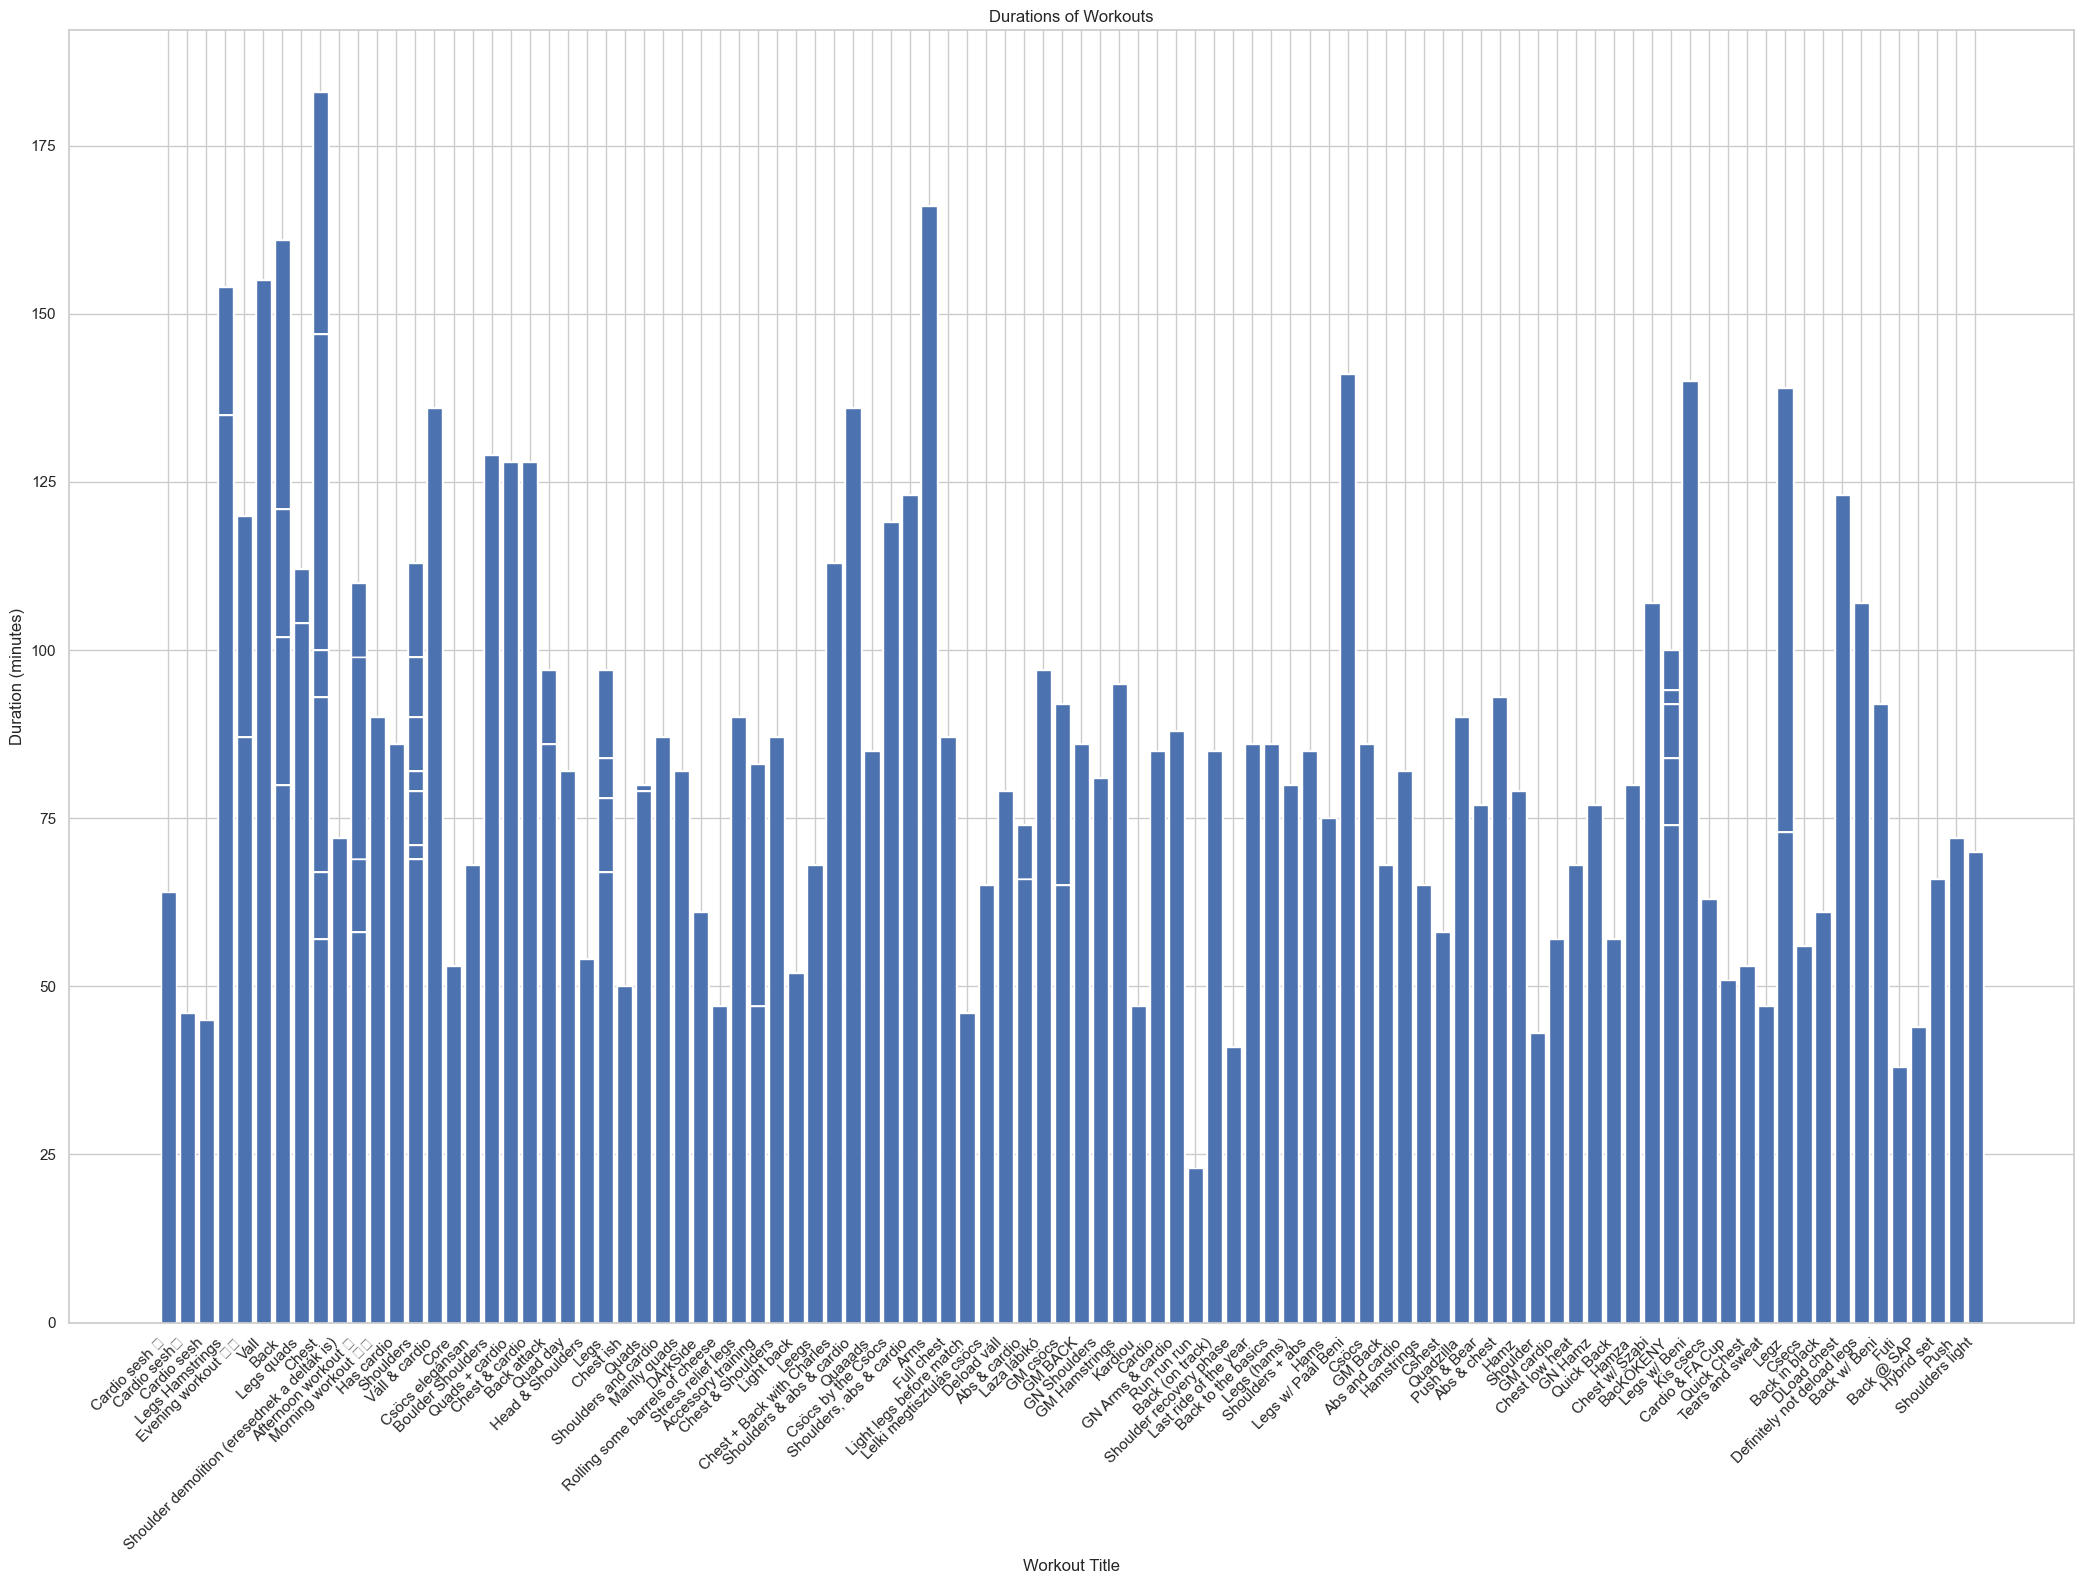

In [45]:
plt.bar(df.title, df.workout_duration, color='b')
plt.xlabel('Workout Title')
plt.ylabel('Duration (minutes)')
plt.title('Durations of Workouts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\161554328.py:19: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\161554328.py:19: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\161554328.py:19: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\161554328.py:19: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\161554328.py:19: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from font(s) Arial.
  fig.c

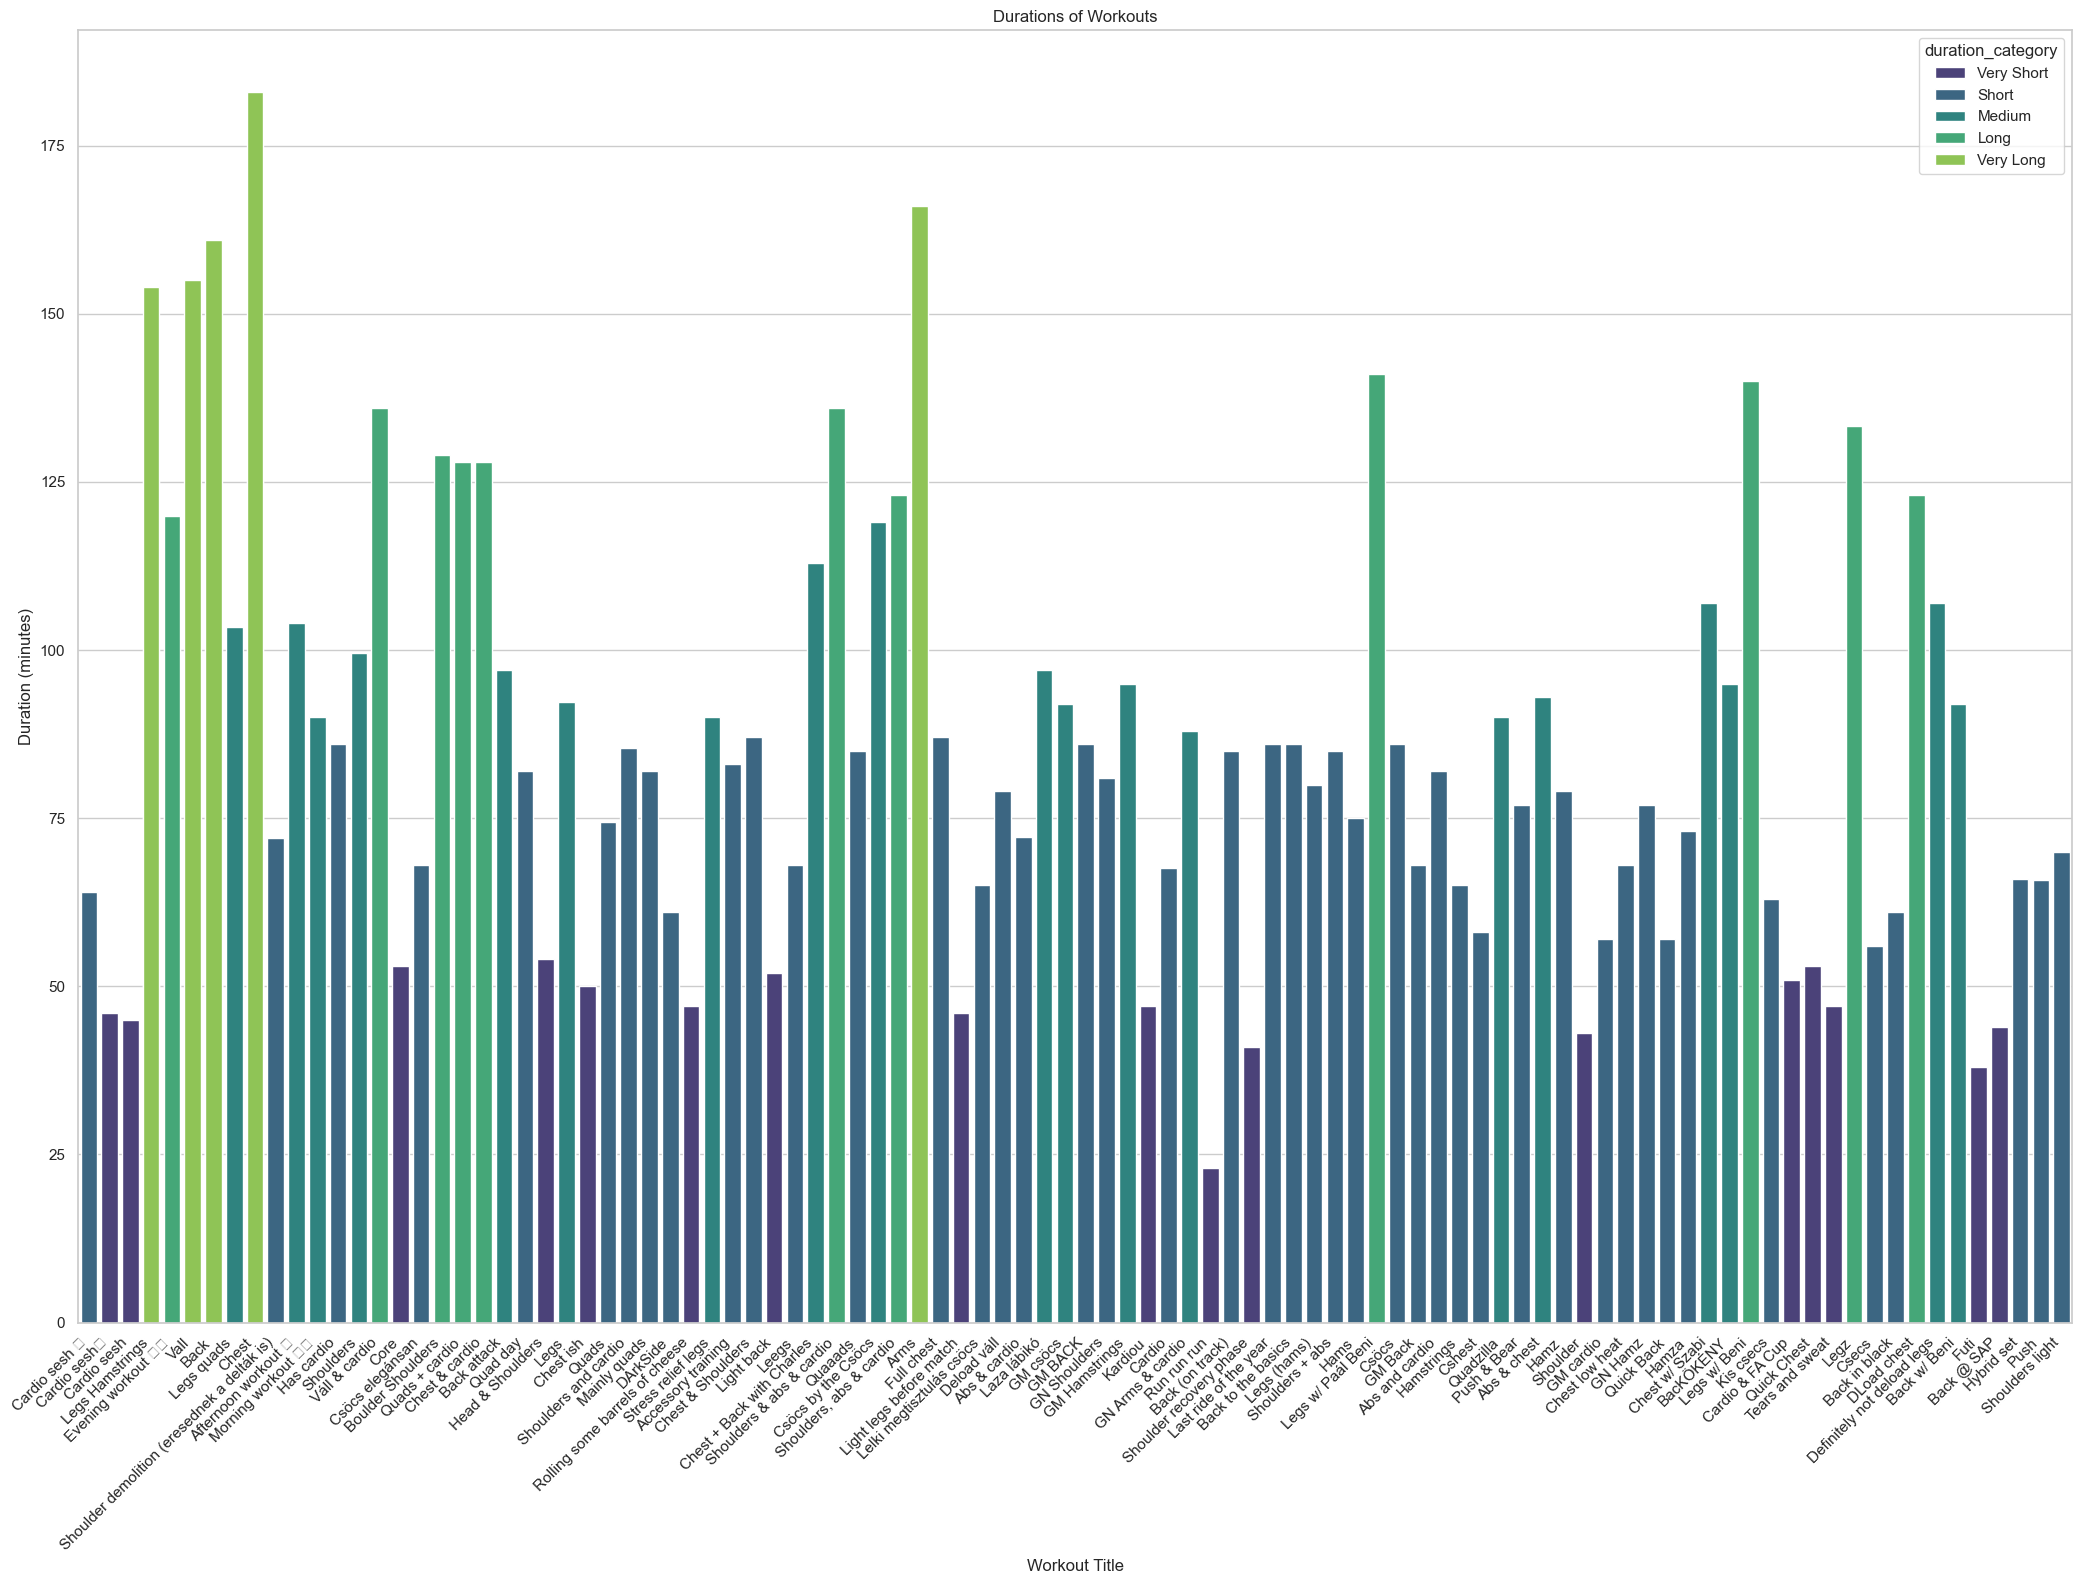

In [46]:
df['duration_category'] = pd.cut(df['workout_duration'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

sns.set_theme(style="whitegrid")

sns.barplot(x='title',
            y='workout_duration',
            hue='duration_category',
            data=df,
            palette='viridis',
            dodge=False,
            errorbar=None)


# Customize the plot
plt.xlabel('Workout Title')
plt.ylabel('Duration (minutes)')
plt.title('Durations of Workouts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Volume Per Workout

C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\2630401984.py:15: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\2630401984.py:15: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\2630401984.py:15: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\2630401984.py:15: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1888\2630401984.py:15: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from font(s) Arial.
  

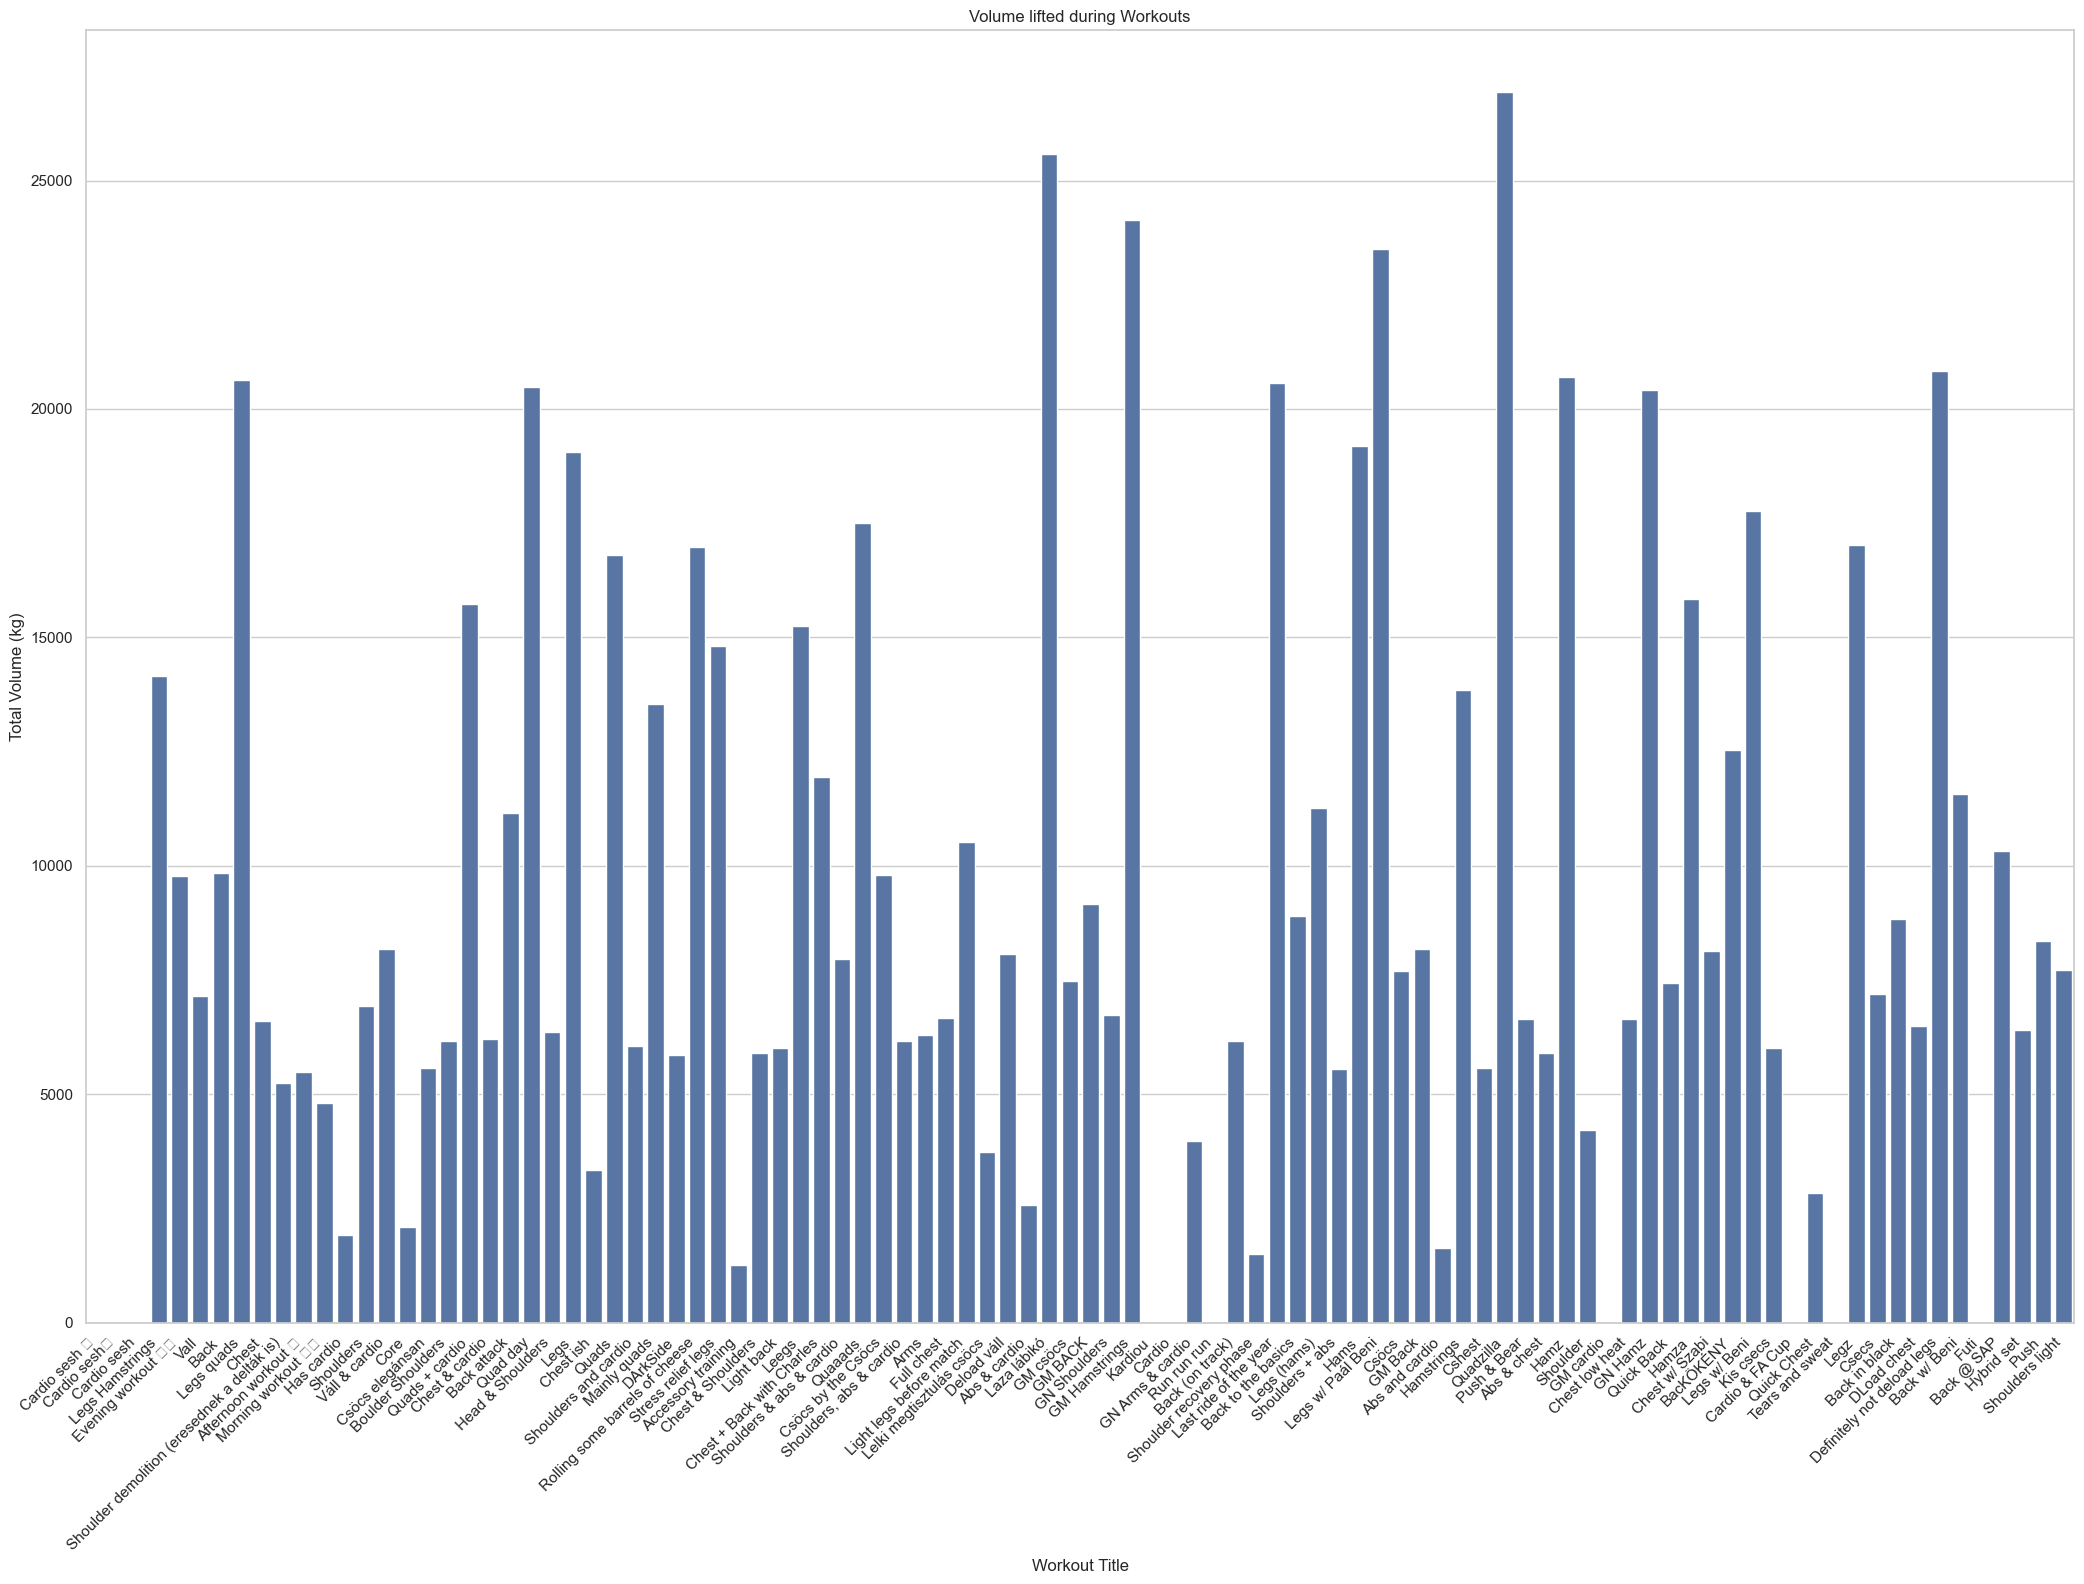

In [47]:
sns.set_theme(style="whitegrid")

sns.barplot(x='title',
            y='total_volume',
            data=df,
            dodge=False,
            errorbar=None)


# Customize the plot
plt.xlabel('Workout Title')
plt.ylabel('Total Volume (kg)')
plt.title('Volume lifted during Workouts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Connection Between Volume and Duration

<Figure size 2100x1600 with 0 Axes>

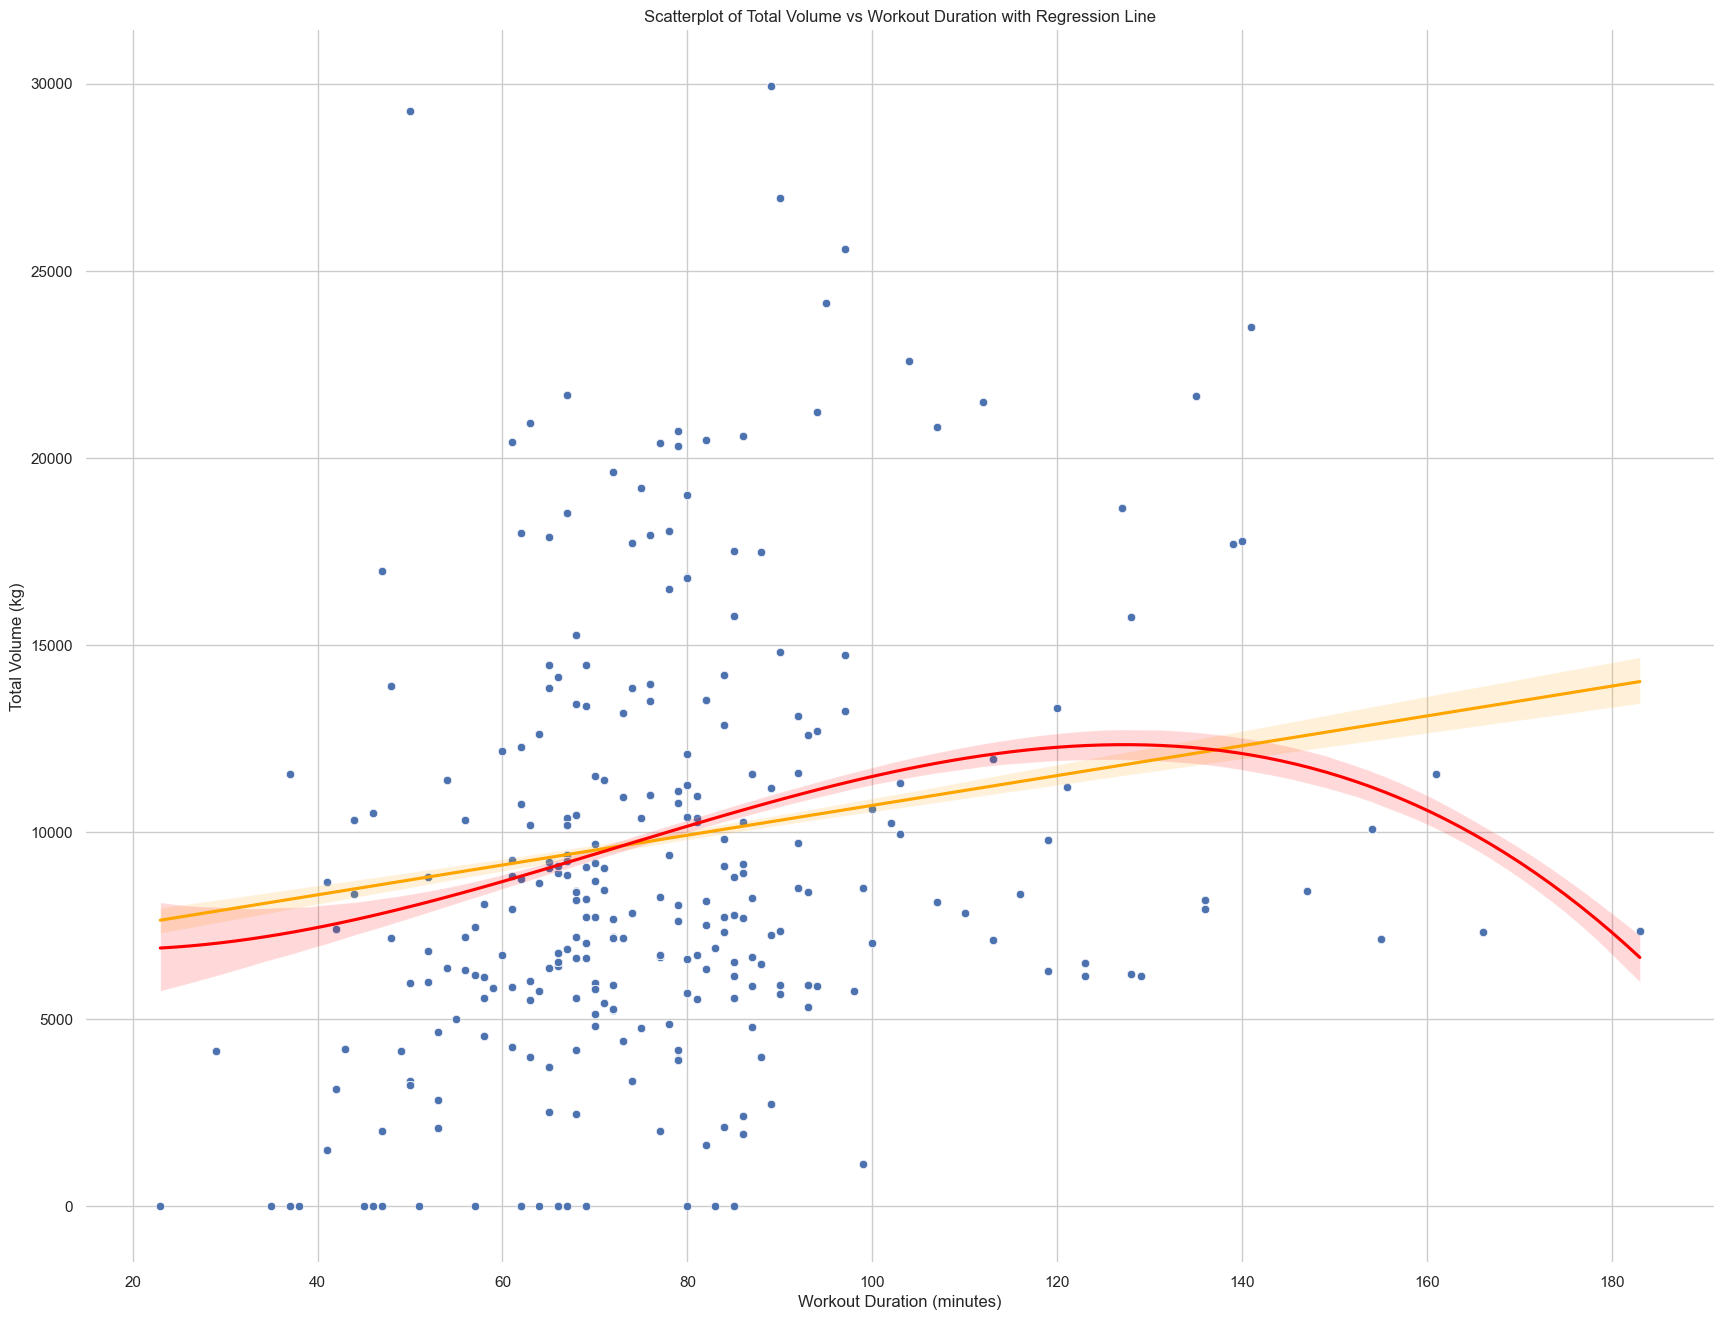

In [49]:
plt.figure(figsize=(21, 16))

f, ax = plt.subplots(figsize=(21, 16))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="workout_duration", 
                y="total_volume",
                data=df, 
                ax=ax)

sns.regplot(x="workout_duration", y="total_volume",
            data=df, 
            ax=ax, 
            scatter=False, 
            color='orange')

sns.regplot(x="workout_duration", 
            y="total_volume",
            data=df, 
            ax=ax, 
            scatter=False, 
            order=3, 
            color='red')

plt.xlabel('Workout Duration (minutes)')
plt.ylabel('Total Volume (kg)')
plt.title('Scatterplot of Total Volume vs Workout Duration with Regression Line')
plt.show()

### Clustering of features

#### Hierarchical Clustering

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def encode(df: pd.DataFrame) -> pd.DataFrame:
    """Encoding the DataFrame

    Args:
        df (pd.DataFrame): Input DataFrame

    Returns:
        pd.DataFrame: Encoded DataFrame
    """
    df_encoded = df.copy()
    for column in df_encoded.select_dtypes(include=['object', 'category', 'datetime64']):
        if column == 'start_time' or column == 'end_time':
            df_encoded[column] = df_encoded[column].astype(int) / 10**9
        else:
            df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    return df_encoded

label_encoder = LabelEncoder()

grouped_df = df.groupby('title').agg({'workout_duration': 'mean', 'total_volume': 'mean'}).reset_index()

df_encoded = encode(grouped_df.copy())

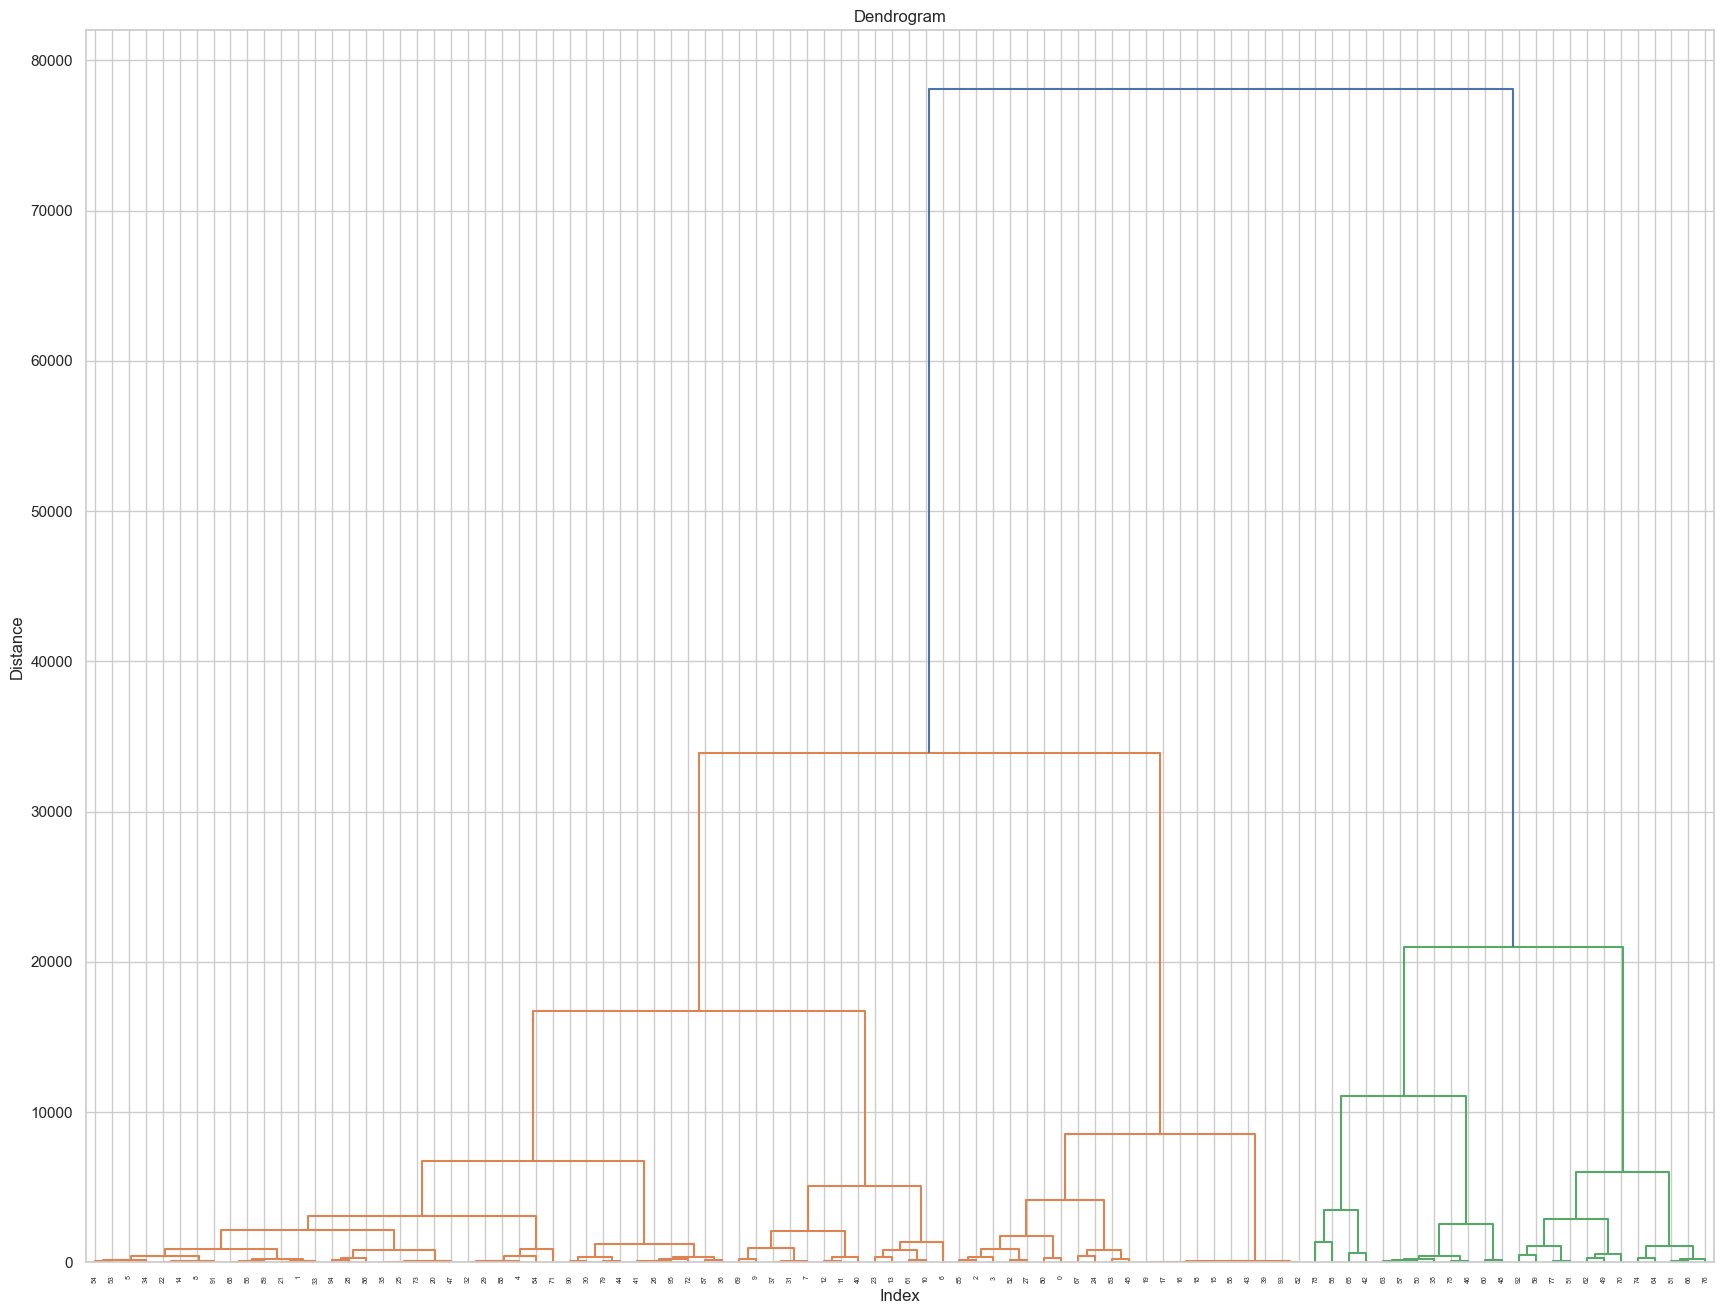

In [52]:
hierarchical_clustering = AgglomerativeClustering(n_clusters = 5)
hierarchy_cluster = hierarchical_clustering.fit_predict(df_encoded)
linked = linkage(df_encoded, method='ward')

# Plot the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [53]:
n_clusters = 7
kmeans = KMeans(n_clusters = n_clusters, 
                random_state = 0).fit(encode(df.copy()))

df['cluster'] = kmeans.labels_

In [54]:
kmeans.cluster_centers_[:, df.columns.get_loc('workout_duration')]

array([82.40744921, 82.29658793, 69.06469501, 98.84102142, 73.43937419,
       62.01490066, 83.17496962])

In [55]:
kmeans.cluster_centers_[:, df.columns.get_loc('total_volume')]

array([ 9359.06207675,  9718.68766404, 10422.16266174,  9844.69357496,
        9926.45241199, 11625.8013245 ,  9700.56014581])

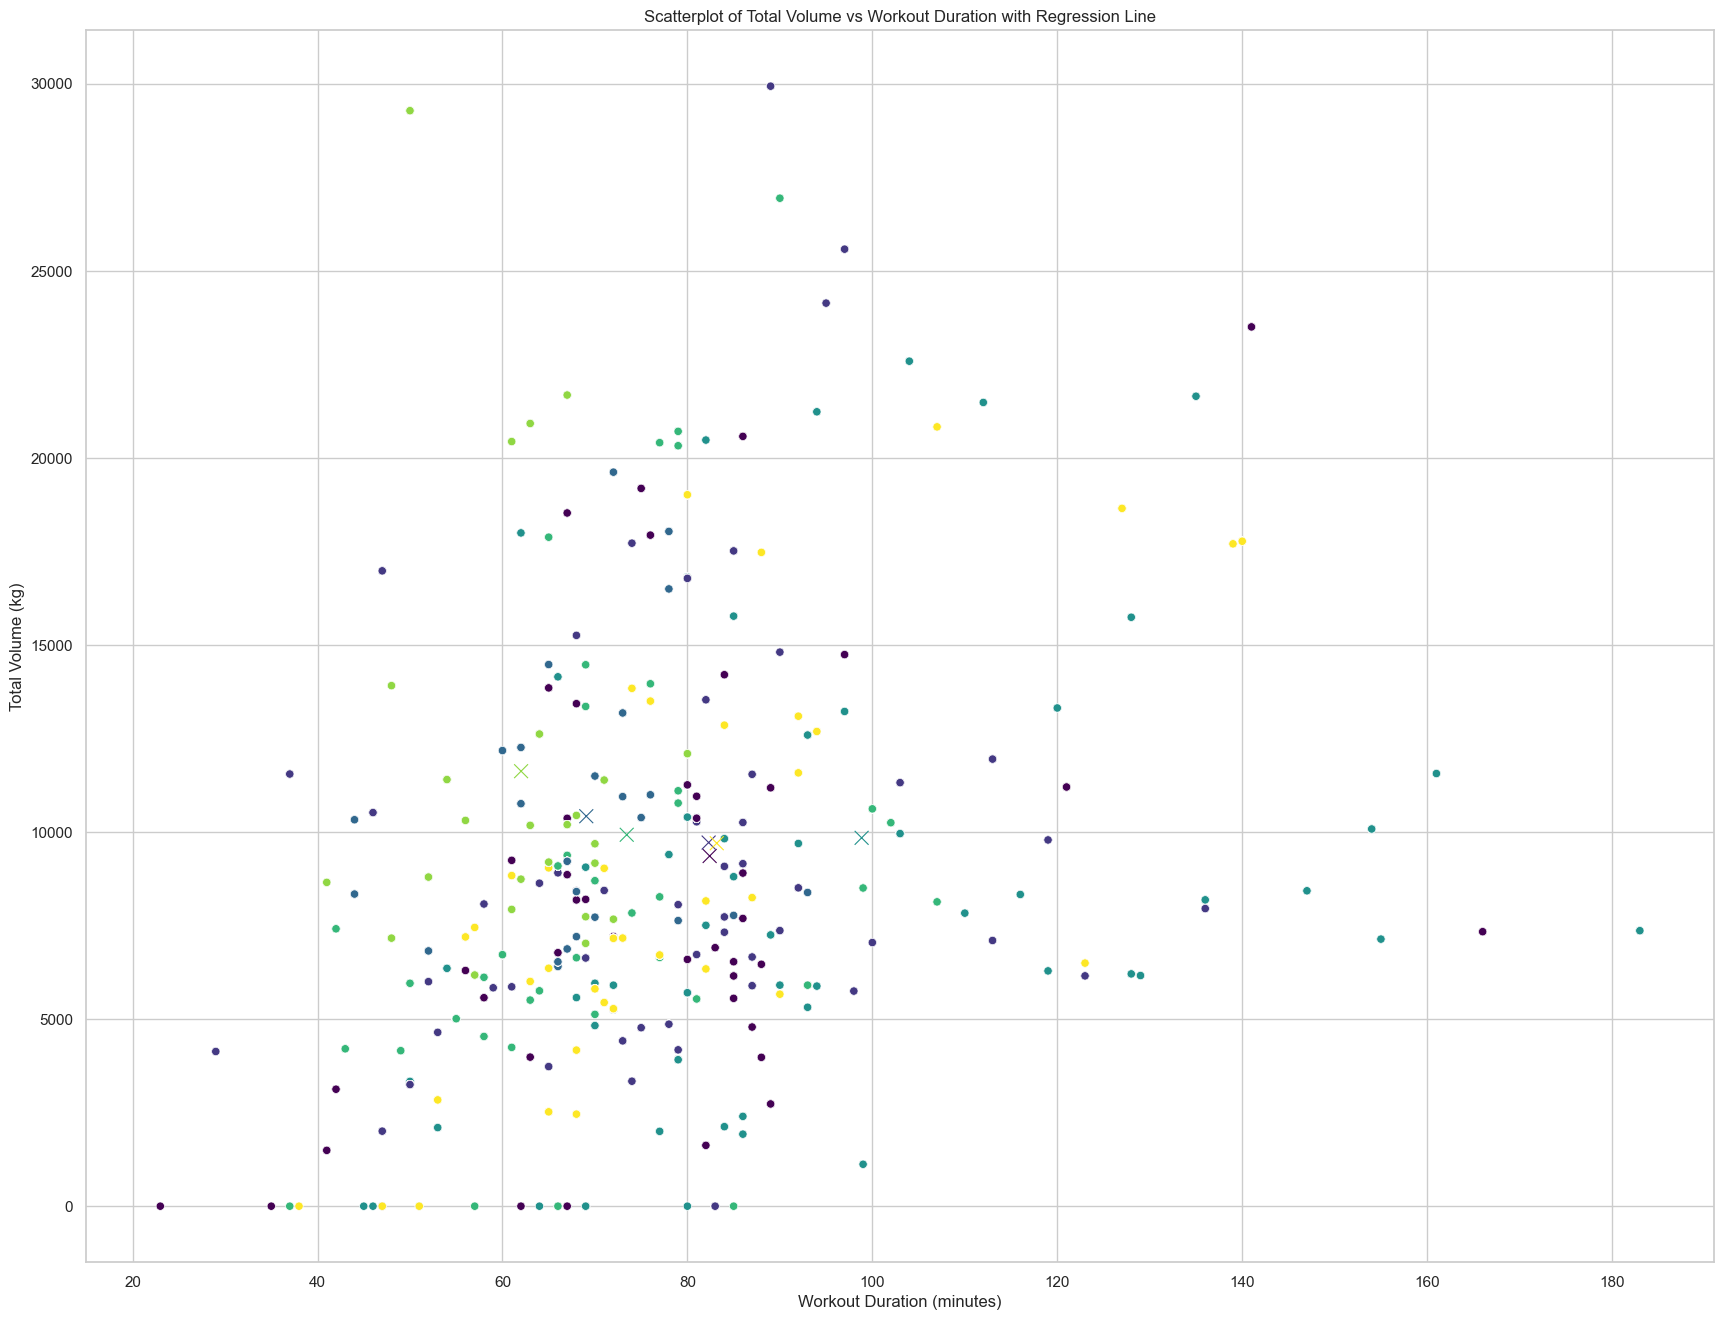

In [56]:
sns.scatterplot(x='workout_duration', y='total_volume', data=df, hue='cluster', palette='viridis')
sns.scatterplot(x = kmeans.cluster_centers_[:, df.columns.get_loc('workout_duration')],  
                y = kmeans.cluster_centers_[:, df.columns.get_loc('total_volume')], 
                hue=range(7),
                palette='viridis',
                s = 100, 
                marker = 'x')

plt.xlabel('Workout Duration (minutes)')
plt.ylabel('Total Volume (kg)')
plt.title('Scatterplot of Total Volume vs Workout Duration with Regression Line')
plt.legend().remove()
plt.show()